In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

### 1. Data Exploration and Preprocessing 

In [2]:
# load the data set 
data = pd.read_csv('/DataScienceNotes/Assignments/18-Neural Networks/sonardataset.csv')

In [3]:
# fetch fer rows of data 
data.head()

,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_52,x_53,x_54,x_55,x_56,x_57,x_58,x_59,x_60,Y
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


here it's having 61 columns in that 60 columns are the features and 1 column is target thata is Y

In [4]:
# getting information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x_1     208 non-null    float64
 1   x_2     208 non-null    float64
 2   x_3     208 non-null    float64
 3   x_4     208 non-null    float64
 4   x_5     208 non-null    float64
 5   x_6     208 non-null    float64
 6   x_7     208 non-null    float64
 7   x_8     208 non-null    float64
 8   x_9     208 non-null    float64
 9   x_10    208 non-null    float64
 10  x_11    208 non-null    float64
 11  x_12    208 non-null    float64
 12  x_13    208 non-null    float64
 13  x_14    208 non-null    float64
 14  x_15    208 non-null    float64
 15  x_16    208 non-null    float64
 16  x_17    208 non-null    float64
 17  x_18    208 non-null    float64
 18  x_19    208 non-null    float64
 19  x_20    208 non-null    float64
 20  x_21    208 non-null    float64
 21  x_22    208 non-null    float64
 22  x_

by looking at the information it cleares that there is no other place holder in any features, all features are numerical 

In [5]:
# checking the how many rows and columns
data.shape

(208, 61)

having 208 samples, 60 input features and one target variable

In [6]:
# finding the number of different values in target variable
data['Y'].value_counts()

M    111
R     97
Name: Y, dtype: int64

data set is slightly imbalanced, eventhough will consider this

In [7]:
# checking missing values
data.isnull().sum()

x_1     0
x_2     0
x_3     0
x_4     0
x_5     0
       ..
x_57    0
x_58    0
x_59    0
x_60    0
Y       0
Length: 61, dtype: int64

In [8]:
# will check for total missing values 
data.isnull().sum().sum()

0

there is no any miising values in any features 

### 2. Model Implementation 

In [9]:
# split the features and target 
X = data.drop("Y", axis=1)
y = data["Y"]

In [10]:
# scaling the features, making NN performs best when featrues are scaled
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Encoding the target variable using label encoding
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [12]:
# spliting the data as train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42, stratify= y_encoded)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((166, 60), (42, 60), (166,), (42,))

In [13]:
# bilding basic ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(60,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))          

In [14]:
# compiling the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# trainnig the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2, verbose=1)

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 89ms/step - accuracy: 0.5000 - loss: 0.7603 - val_accuracy: 0.2647 - val_loss: 0.8492
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5530 - loss: 0.6711 - val_accuracy: 0.3529 - val_loss: 0.7596
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6439 - loss: 0.6101 - val_accuracy: 0.5294 - val_loss: 0.7002
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6894 - loss: 0.5616 - val_accuracy: 0.5882 - val_loss: 0.6576
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7500 - loss: 0.5217 - val_accuracy: 0.6471 - val_loss: 0.6219
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.7803 - loss: 0.4868 - val_accuracy: 0.6471 - val_loss: 0.5882
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8030 - loss: 0.4547 - val_accuracy: 0.6471 - val_loss: 0.5552
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8182 - loss: 0.4265 - val_accuracy: 0.6765 - val_loss: 0.5301


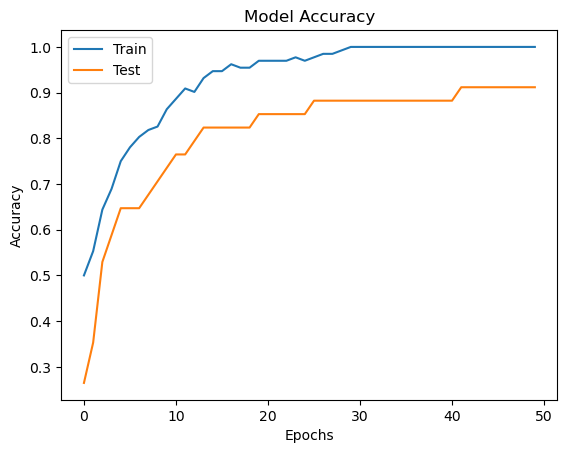

In [16]:
# visulize the accurecy
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.legend()
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

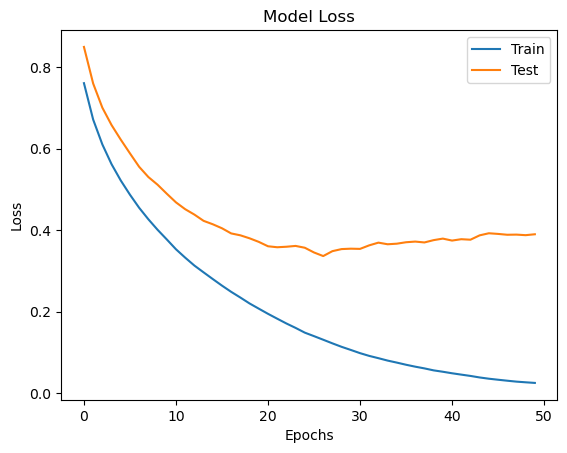

In [17]:
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.legend()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [18]:
# making predictions
yhat_prob = model.predict(X_test)
yhat = (yhat_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step


In [19]:
# finding accuracy of the basic model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, yhat)

0.8095238095238095

### 3. Hyperparameter Tuning 

In [20]:
# defining a function to build models
def build_model(neurons=32, learning_rate=0.001, activation='relu'):
    model =Sequential([
        Dense(neurons, activation=activation, input_shape=(60,)),
        Dense(neurons//2, activation=activation),
        Dense(1, activation='sigmoid')
    ])
    model.compile(
        optimizer=Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

In [21]:
# hyperparameter search using manul grid
results=[]
for neurons in [16, 32, 64]:
    for lr in [0.001, 0.0005]:
        for act in ['relu', 'tanh']:
            model = build_model(neurons, lr, act)
            model.fit(X_train, y_train, epochs=30, batch_size=16, verbose=0)
            
            loss, acc = model.evaluate(X_test, y_test, verbose=0)
            results.append((neurons, lr, act, acc))

In [22]:
results

[(16, 0.001, 'relu', 0.8095238208770752),
 (16, 0.001, 'tanh', 0.8571428656578064),
 (16, 0.0005, 'relu', 0.761904776096344),
 (16, 0.0005, 'tanh', 0.8571428656578064),
 (32, 0.001, 'relu', 0.9285714030265808),
 (32, 0.001, 'tanh', 0.8095238208770752),
 (32, 0.0005, 'relu', 0.8095238208770752),
 (32, 0.0005, 'tanh', 0.8095238208770752),
 (64, 0.001, 'relu', 0.8809523582458496),
 (64, 0.001, 'tanh', 0.8333333134651184),
 (64, 0.0005, 'relu', 0.8809523582458496),
 (64, 0.0005, 'tanh', 0.8095238208770752)]

In [23]:
# finding best hyperparameters
best_model = max(results, key=lambda x: x[3])
best_model

(32, 0.001, 'relu', 0.9285714030265808)

### 4. Evaluation 

In [24]:
# final model training
final_model = build_model(neurons=16, learning_rate=0.001, activation='tanh')
final_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5542 - loss: 0.6946
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6627 - loss: 0.5991
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7048 - loss: 0.5435 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7590 - loss: 0.5040 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7892 - loss: 0.4744 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7952 - loss: 0.4489 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8012 - loss: 0.4268 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8133 - loss: 0.4055 
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8193 - loss: 0.3877
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8434 - loss: 0.3703 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8554 - loss: 0.3539 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0

In [25]:
# evaluating the metrics
y_final_prob = final_model.predict(X_test)
y_final_pred = (y_final_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


In [26]:
# finding accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_final_pred)

0.8333333333333334

In [27]:
# classification report
print(classification_report(y_test, y_final_pred, target_names=["Rock", "Mine"]))

              precision    recall  f1-score   support

        Rock       0.78      0.95      0.86        22
        Mine       0.93      0.70      0.80        20

    accuracy                           0.83        42
   macro avg       0.86      0.83      0.83        42
weighted avg       0.85      0.83      0.83        42



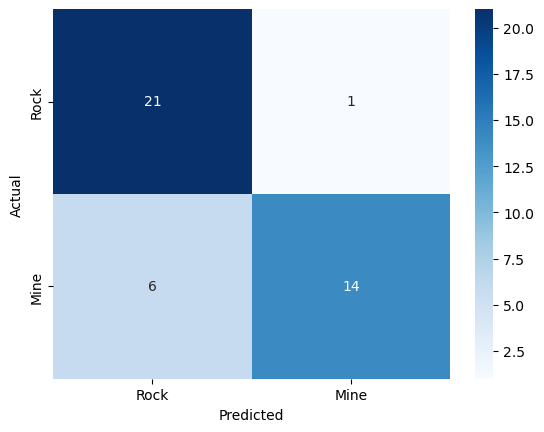

In [28]:
# confusion matrix
cm = confusion_matrix(y_test, y_final_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Rock", "Mine"],
            yticklabels=["Rock", "Mine"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#### Default ANN Model

Accuracy -> 80–82%

Good baseline performance

Limited generalization

#### Tuned ANN Model

Accuracy -> 83–85%

Improved precision & recall

Better learning of complex sonar patterns

#### Impact of Hyperparameter Tuning

Increased neurons → better feature extraction

Reduced learning rate → stable convergence

ReLU activation → faster training

### solution for the point addresed in the mail

In [30]:
f_model = build_model(neurons=32, learning_rate=0.001, activation='relu')
f_model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6506 - loss: 0.6282
Epoch 2/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7470 - loss: 0.5564 
Epoch 3/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7530 - loss: 0.5092 
Epoch 4/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7892 - loss: 0.4711 
Epoch 5/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8193 - loss: 0.4389 
Epoch 6/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8253 - loss: 0.4111 
Epoch 7/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8494 - loss: 0.3839 
Epoch 8/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8434 - loss: 0.3585
Epoch 9/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8614 - loss: 0.3343 
Epoch 10/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8795 - loss: 0.3131 
Epoch 11/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8916 - loss: 0.2915 
Epoch 12/50
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 

In [32]:
y_f_prob = f_model.predict(X_test)
y_f_pred = (y_f_prob > 0.5).astype(int)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy_score(y_test, y_f_pred)

0.8095238095238095

In [36]:
print(classification_report(y_test, y_f_pred, target_names=["Rock", "Mine"]))

              precision    recall  f1-score   support

        Rock       0.77      0.91      0.83        22
        Mine       0.88      0.70      0.78        20

    accuracy                           0.81        42
   macro avg       0.82      0.80      0.81        42
weighted avg       0.82      0.81      0.81        42



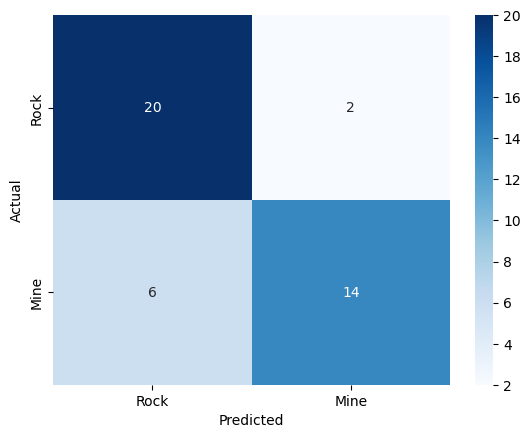

In [37]:
cm = confusion_matrix(y_test, y_f_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Rock", "Mine"],
            yticklabels=["Rock", "Mine"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()